# Analysis Serie A dataset season 2023/2024

## Aim of this project

- The champion
- Team with the highest probability win per match
- Team with the highest average goal per match 
- Percentage result of matchday
- Team with the most win at home/away
- Team with the most goal in first half/second half
- Tren of total goals in per matchday
- The goal difference of different teams

#### Import libraries that will be used

In [1]:
import pandas as pd # For manipulating data
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For data visualization
import numpy as np # For math and linear algebra

sns.set_style("darkgrid")

#### Load Dataset that will be used for analysis

Link download dataset : https://www.kaggle.com/api/v1/datasets/download/hamdankhan212/europe-top-leagues-2023-24-matches-football

There are some datasets from different league. But, for this project, i only using Serie A dataset.

In [6]:
serieA_df = pd.read_csv("serie_A.csv",delimiter=",")
serieA_df.head(5)

,date,matchday,home_team,away_team,home_score_full_time,away_score_full_time,home_score_half_time,away_score_half_time,goal_diff,winner,defeat,ref
0,2023-08-19T16:30:00Z,1,Empoli,Verona,0,1,0,0,1,Verona,Empoli,Luca Massimi
1,2023-08-19T16:30:00Z,1,Frosinone,Napoli,1,3,1,2,2,Napoli,Frosinone,Matteo Marcenaro
2,2023-08-19T18:45:00Z,1,Genoa,Fiorentina,1,4,0,3,3,Fiorentina,Genoa,Giovanni Ayroldi
3,2023-08-19T18:45:00Z,1,Inter,Monza,2,0,1,0,2,Inter,Monza,Andrea Colombo
4,2023-08-20T16:30:00Z,1,Roma,Salernitana,2,2,1,1,0,DRAW,DRAW,Ermanno Feliciani


See details info of dataset like The class type of the object,The number of entries (rows) in the DataFrame,The number of columns,The names of the columns,The data types of each column,The number of non-null values in each column, and The memory usage of the DataFrame.

In [3]:
serieA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  380 non-null    object
 1   matchday              380 non-null    int64 
 2   home_team             380 non-null    object
 3   away_team             380 non-null    object
 4   home_score_full_time  380 non-null    int64 
 5   away_score_full_time  380 non-null    int64 
 6   home_score_half_time  380 non-null    int64 
 7   away_score_half_time  380 non-null    int64 
 8   goal_diff             380 non-null    int64 
 9   winner                380 non-null    object
 10  defeat                380 non-null    object
 11  ref                   380 non-null    object
dtypes: int64(6), object(6)
memory usage: 35.8+ KB


The output of code above shows that nothing missing value on this dataset

## Exploratory Data Analysis (EDA)

Now, we enter the EDA stage. Here we will calculates the number of wins, draws, and defeats for home and away teams based on the match results.

In [4]:
home_win = serieA_df['home_team'].loc[serieA_df['winner'] == serieA_df['home_team']].value_counts().reset_index().sort_values(by="home_team",ascending=True).reset_index(drop=True)
away_win = serieA_df['away_team'].loc[serieA_df['winner'] == serieA_df['away_team']].value_counts().reset_index().sort_values(by="away_team",ascending=True).reset_index(drop=True)

home_draw = serieA_df['home_team'].loc[serieA_df['winner'] == "DRAW"].value_counts().reset_index().sort_values(by="home_team",ascending=True).reset_index(drop=True)
away_draw = serieA_df['away_team'].loc[serieA_df['winner'] == "DRAW"].value_counts().reset_index().sort_values(by="away_team",ascending=True).reset_index(drop=True)

home_defeat = serieA_df['home_team'].loc[serieA_df['defeat'] == serieA_df['home_team']].value_counts().reset_index().sort_values(by="home_team",ascending=True).reset_index(drop=True)
away_defeat = serieA_df['away_team'].loc[serieA_df['defeat'] == serieA_df['away_team']].value_counts().reset_index().sort_values(by="away_team",ascending=True).reset_index(drop=True)

summarizes the performance of soccer teams based on their match results from the code above. with calculates the number of wins, draws, and losses for each team, and then computes the points earned by each team at home and away. Afterwards, constructs a DataFrame for this summarizes which is called "match_results".

In [5]:
# Make the dataframe from prevously explore 
match_results = pd.DataFrame({
    "Team" : home_win['home_team'],
    "Win_at_home" : home_win['count'],
    "Win_at_away" : away_win['count'],
    "Draw_at_home" : home_draw['count'],
    "Draw_at_away" : away_draw['count'],
    "Lose_at_home" : home_defeat['count'],
    "Lose_at_away" : away_defeat['count'],
})
match_results['Point_earned_at_home'] = (match_results['Win_at_home']*3) + (match_results['Draw_at_home'])
match_results['Point_earned_at_away'] = (match_results['Win_at_away']*3) + (match_results['Draw_at_away'])
pd.DataFrame(match_results).head()

,Team,Win_at_home,Win_at_away,Draw_at_home,Draw_at_away,Lose_at_home,Lose_at_away,Point_earned_at_home,Point_earned_at_away
0,Atalanta,13,8,2,4,4,7,41,28
1,Bologna,12,6,5,9,2,4,41,27
2,Cagliari,6,2,7,5,6,12,25,11
3,Empoli,5,4,5,4,9,11,20,16
4,Fiorentina,10,7,5,4,4,8,35,25


Create a comprehensive summary of scoring and conceding statistics for each team in Serie A league.

In [6]:
home_score_ht_ft = serieA_df.groupby(by='home_team').agg({
    "home_score_full_time" : "sum",
    "home_score_half_time" : "sum",
}).reset_index()


away_score_ht_ft = serieA_df.groupby(by='away_team').agg({
    "away_score_full_time" : "sum",
    "away_score_half_time" : "sum"
}).reset_index()

gc_home_ht_ft = serieA_df.groupby(by='away_team').agg({
    "home_score_full_time" : "sum",
    "home_score_half_time" : "sum"
}).reset_index()


gc_away_ht_ft = serieA_df.groupby(by='home_team').agg({
    "away_score_full_time" : "sum",
    "away_score_half_time" : "sum"
}).reset_index()

# creates a new DataFrame called "goal_details" Each key in the dictionary corresponds to a column in the new DataFrame. The second half scores for both home and away teams are calculated by subtracting the first half scores from the full-time scores.
goal_details = pd.DataFrame({
    "Team name" : home_score_ht_ft['home_team'],
    "Home score" : home_score_ht_ft['home_score_full_time'],
    "Home score (first half)" : home_score_ht_ft['home_score_half_time'],
    "Home score (second half)" : home_score_ht_ft['home_score_full_time'] - home_score_ht_ft['home_score_half_time'],
    "Away score" : away_score_ht_ft['away_score_full_time'],
    "Away score (first half)" : away_score_ht_ft['away_score_half_time'],
    "Away score (second half)" : away_score_ht_ft['away_score_full_time'] - away_score_ht_ft['away_score_half_time'],
    "Home concedeed" : gc_home_ht_ft['home_score_full_time'],
    "Home concedeed (first half)" : gc_home_ht_ft['home_score_half_time'],
    "Home concedeed (second half)" : gc_home_ht_ft['home_score_full_time'] - gc_home_ht_ft['home_score_half_time'],
    "Away concedeed" : gc_away_ht_ft['away_score_full_time'],
    "Away concedeed (first half)" : gc_away_ht_ft['away_score_half_time'],
    "Away concedeed (second half)" : gc_away_ht_ft['away_score_full_time'] - gc_away_ht_ft['away_score_half_time'],
})

goal_details.head()


,Team name,Home score,Home score (first half),Home score (second half),Away score,Away score (first half),Away score (second half),Home concedeed,Home concedeed (first half),Home concedeed (second half),Away concedeed,Away concedeed (first half),Away concedeed (second half)
0,Atalanta,42,22,20,30,13,17,26,14,12,16,7,9
1,Bologna,33,13,20,21,13,8,20,10,10,12,8,4
2,Cagliari,28,9,19,14,3,11,36,13,23,32,16,16
3,Empoli,15,8,7,14,3,11,31,12,19,23,10,13
4,Fiorentina,37,17,20,24,13,11,24,11,13,22,10,12


Creates a DataFrame called "clasement" that summarizes the standings of soccer teams based on their performance in a league. It aggregates various statistics such as wins, draws, losses, goals scored, goals conceded, goal difference, and points earned based on the DataFrame that we were created earlier (goal_details and match_results) 

In [7]:
clasement = pd.DataFrame({
    "Team" : match_results['Team'],
    "Played" : serieA_df['matchday'].max(),
    "win" : match_results['Win_at_home'] + match_results['Win_at_away'],
    "draw" : match_results['Draw_at_home'] + match_results['Draw_at_away'],
    "lose" : match_results['Lose_at_home'] + match_results['Lose_at_away'],
    "Goal_in" : goal_details['Home score'] + goal_details['Away score'],
    "Goal_concedeed" : goal_details['Home concedeed'] + goal_details['Away concedeed'],
    "Goal_difference" : (goal_details['Home score'] + goal_details['Away score']) - (goal_details['Home concedeed'] + goal_details['Away concedeed']),
    "Point" : match_results['Point_earned_at_home'] + match_results['Point_earned_at_away']
})
clasement.head(20)

,Team,Played,win,draw,lose,Goal_in,Goal_concedeed,Goal_difference,Point
0,Atalanta,38,21,6,11,72,42,30,69
1,Bologna,38,18,14,6,54,32,22,68
2,Cagliari,38,8,12,18,42,68,-26,36
3,Empoli,38,9,9,20,29,54,-25,36
4,Fiorentina,38,17,9,12,61,46,15,60
5,Frosinone,38,8,11,19,44,69,-25,35
6,Genoa,38,12,13,13,45,45,0,49
7,Inter,38,29,7,2,89,22,67,94
8,Juventus,38,19,14,5,54,31,23,71
9,Lazio,38,18,7,13,49,39,10,61


Calculates the total goals scored in each matchday of a soccer league, both for full-time and half-time scores.

In [8]:
goal_per_matchday = serieA_df.groupby(by="matchday").agg({
    "home_score_full_time" : "sum",
    "home_score_half_time" : "sum",
    "away_score_full_time" : "sum",
    "away_score_half_time" : "sum",
}).reset_index()
goal_per_matchday['Total'] = goal_per_matchday['home_score_full_time'] + goal_per_matchday['away_score_full_time']
pd.DataFrame(goal_per_matchday).head(20)


,matchday,home_score_full_time,home_score_half_time,away_score_full_time,away_score_half_time,Total
0,1,8,3,18,12,26
1,2,16,11,10,5,26
2,3,17,6,8,4,25
3,4,25,12,12,6,37
4,5,11,5,8,4,19
5,6,15,7,9,5,24
6,7,12,5,11,3,23
7,8,15,8,14,6,29
8,9,9,2,15,5,24
9,10,12,3,11,8,23


## Data Visualization

### The Champion

Creates a bar plot visualization of the final league standings (clasement DataFrame) using seaborn (sns) and matplotlib (plt). The visualization highlights teams based on their position in the league table. The first team (1st place) will be highlighted in yellow (typically representing a league winner and automatically qualify for the Champions League), Teams ranked 2nd to 4th also categorized as qualifying for the Champions League (assigned in blue), Teams ranked 5th and 6th categorized as qualifying for the Europa League (assigned in orange), Teams ranked 7th categorized as qualifying for the Europe Conference League (assign in green), Teams ranked 9th to 17th are assigned gray (mid-table teams), And Teams ranked 18th to 20th (relegation zone) are assigned red (indicating danger of relegation).

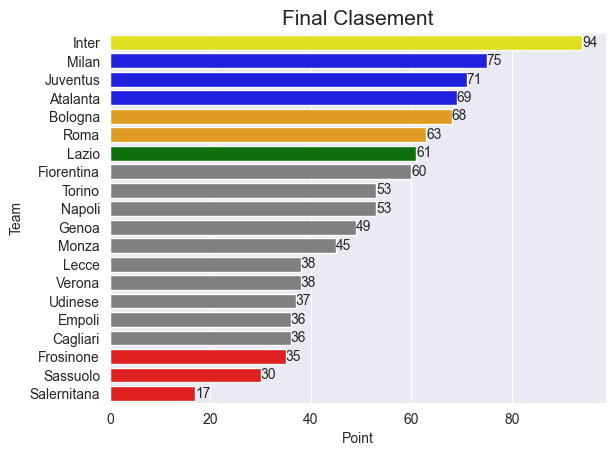

In [9]:
colors = ["yellow"]

for x in range(2,5):
    colors.append("blue")
for x in range(5,7):
    colors.append("orange")
for x in range(7,8):
    colors.append("green")
for x in range(8,18):
    colors.append("gray")
for x in range(18,21):
    colors.append("red")

ax = sns.barplot(data=clasement.sort_values(by="Point",ascending=False),x="Point",y="Team",hue="Team",palette=colors,errorbar=None,)
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
plt.title("Final Clasement", loc="center",fontsize=15)
plt.show()

#### Insight
- The champion of Serie A season 2023/2024 is Inter with 94 points which 19 points difference from the 2nd ranked team (Milan with 75 points).
- Inter, Milan, Juventus, and Atalanta are qualified for the champions League.
- Bologna and roma are qualified for the Europa League 
- Lazio is qualified for the Conference League
- Frosinone, Sassuolo, and Salernitana are relegated to Serie B. 

#### Team with the highest probability win per match

Creates a bar plot visualization of the win ratios of soccer teams based on their performance in the league.

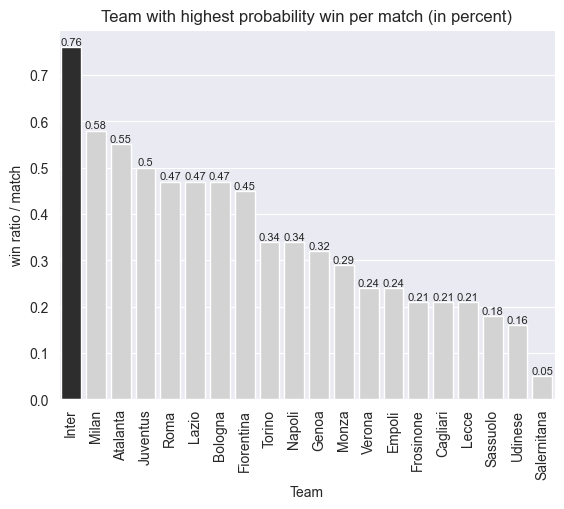

In [10]:
color = ["#2d2d2d"]
for x in range(19):
    color.append("#d3d3d3")
    
win_ratio = pd.DataFrame({
    "Team" : clasement['Team'],
# Calculates the win ratio for each team as the number of wins divided by the total matches played
    "Win_ratio" : clasement['win']/clasement['Played']
}).sort_values(by="Win_ratio",ascending=False).round(2).reset_index(drop=True)
ax = sns.barplot(data=win_ratio,x="Team",y="Win_ratio",hue="Team",palette=color)
ax.tick_params(axis="x",rotation=90)
ax.set_ylabel("win ratio / match")
for container in ax.containers:
    ax.bar_label(container,fontsize=8)

plt.title("Team with highest probability win per match (in percent)", loc="center",fontsize=12)
plt.show()

##### Insight

The highest probability win is Inter with 76% probability to win every match.

#### Team with the highest average goal per match

Create a bar plot that visualizes the average goals scored per match by different teams. Which highlighting the team with the highest average in green and the others in light gray.

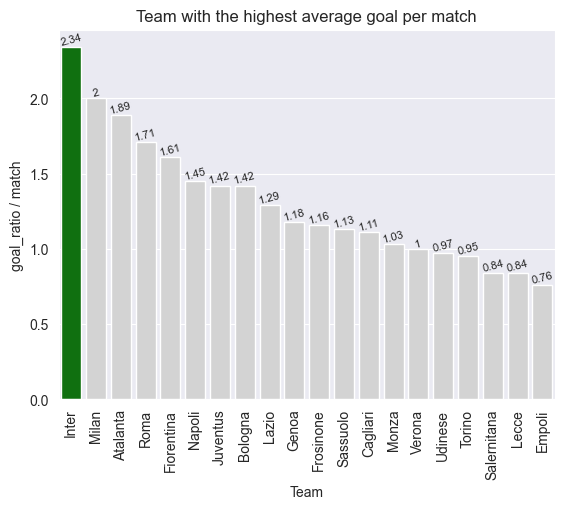

In [11]:
color = ["green"]
for x in range(19):
    color.append("#d3d3d3")
goal_ratio = pd.DataFrame({
    "Team" : clasement['Team'],
    "goal_ratio" : clasement['Goal_in']/clasement['Played']
}).sort_values(by="goal_ratio",ascending=False).reset_index(drop=True)

ax = sns.barplot(data=goal_ratio.round(2),x="Team",y="goal_ratio",palette=color,hue="Team")
ax.tick_params(axis="x",rotation=90)
ax.set_ylabel("goal_ratio / match")
for container in ax.containers:
    ax.bar_label(container,fontsize=8,rotation=15)
plt.title("Team with the highest average goal per match",loc="center",fontsize=12)

plt.show()


##### Insight

The highest average goal per match is Inter with 2.34 goal in every match.

#### Percentage result of matchday

Calculates the total number of match results categorized as "Win or Lose" and "Draw" from a DataFrame named "match_results". Then, creates a pie chart to visualize the percentage of these results.

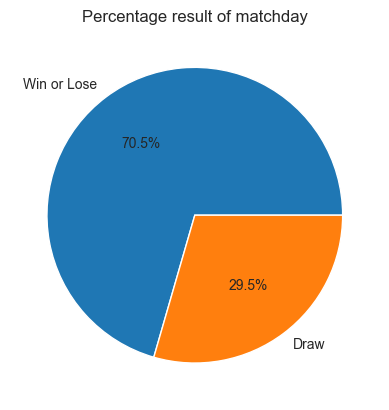

In [12]:

x = [(match_results['Win_at_home'] + match_results['Win_at_away']).sum() + (match_results['Lose_at_home'] + match_results['Lose_at_away']).sum(),
     (match_results['Draw_at_home'] + match_results['Draw_at_away']).sum()]
labels = ["Win or Lose","Draw"]
plt.pie(x=x, labels=labels,autopct='%0.1f%%')
plt.title("Percentage result of matchday",loc="center",fontsize=12)
plt.show()



##### Insight

From 380 match, there are 70.5% of entire match with match results win/draw and 29.5% that neither winner team nor defeat team (draw). 

#### Team with the most win at home/away


Creates a bar plot that visualizes the number of wins for different teams, distinguishing between home and away wins that combines the data into a single DataFrame.

<Figure size 2400x1000 with 0 Axes>

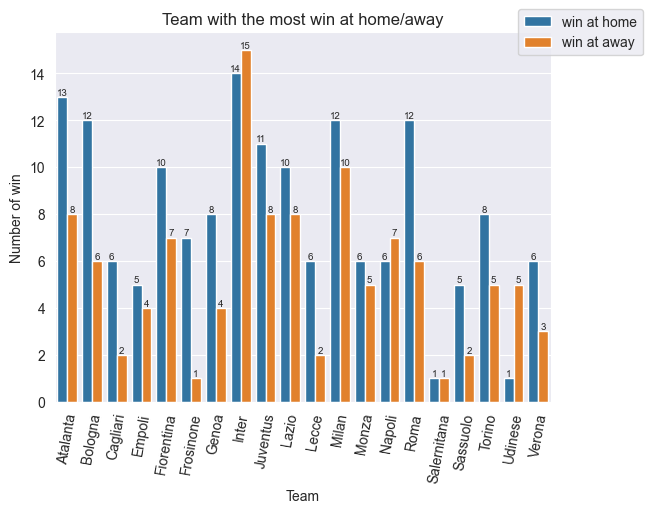

In [13]:

home = pd.DataFrame({
    "Team" : match_results['Team'],
    "win" : match_results['Win_at_home'],
    "category" : "win at home"
})
away = pd.DataFrame({
    "Team" : match_results['Team'],
    "win" : match_results['Win_at_away'],
    "category" : "win at away"
})


fusion = pd.concat([home,away])

plt.figure(figsize=(24,10))
fig,ax = plt.subplots()
sns.barplot(x=fusion['Team'],y=fusion['win'],hue=fusion['category'],ax=ax)
ax.set_xlabel('Team')
ax.set_ylabel('Number of win')
ax.set_title("Team with the most win at home/away")
ax.tick_params('x',rotation=80)

for container in ax.containers:
    ax.bar_label(container,fontsize=7)

plt.legend(loc="right",bbox_to_anchor=(1.2,1))
plt.show()

##### Insight
Inter dominated with 14 wins at home and 15 wins at away

#### Team with the most goal in first half/second half

Creates a bar plot that visualizes the total goals scored by different teams in the first half and second half of matches that combines the data into a single DataFrame.

<Figure size 2400x1000 with 0 Axes>

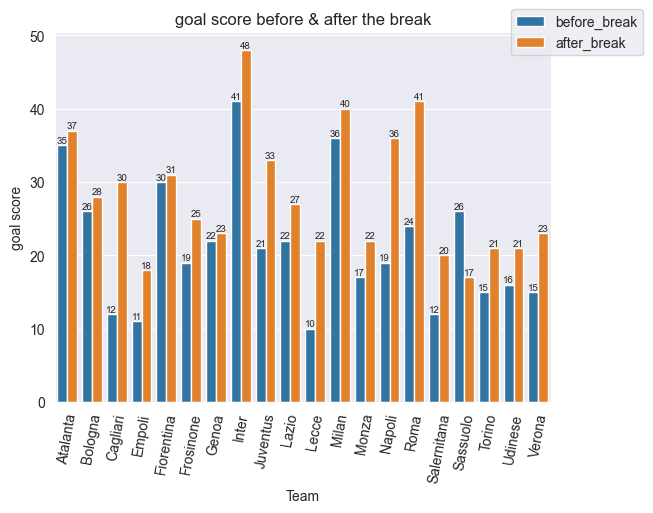

In [14]:
first_half = pd.DataFrame({
    "Team" : goal_details['Team name'],
    "goal_score" : goal_details['Home score (first half)'] + goal_details['Away score (first half)'],
    "category" : "before_break"
})

second_half = pd.DataFrame({
    "Team" : goal_details['Team name'],
    "goal_score" : goal_details['Home score (second half)'] + goal_details['Away score (second half)'],
    "category" : "after_break"
})

fusion_goal = pd.concat([first_half,second_half])

plt.figure(figsize=(24,10))
fig,ax = plt.subplots()
sns.barplot(x=fusion_goal['Team'],y=fusion_goal['goal_score'],hue=fusion_goal['category'],ax=ax)
ax.set_xlabel('Team')
ax.set_ylabel('goal score')
ax.set_title("goal score before & after the break")
ax.tick_params('x',rotation=80)

for container in ax.containers:
    ax.bar_label(container,fontsize=7)

plt.legend(loc="right",bbox_to_anchor=(1.2,1))
plt.show()

##### Insight
Inter dominated again with 41 goals in first half and 48 goals in second half.

#### Trend of total goals in per matchday

Creates a point plot that visualizes the total goals scored per matchday.

<Figure size 1000x800 with 0 Axes>

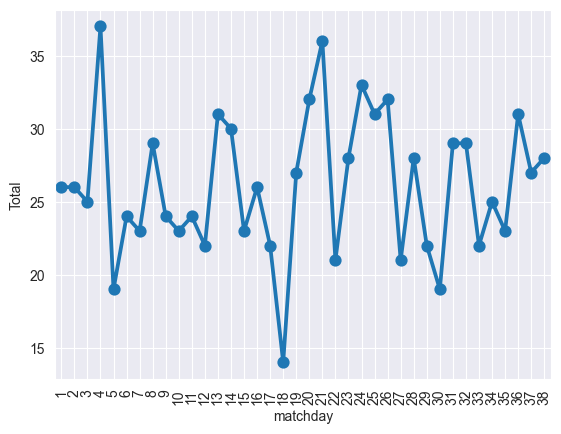

In [15]:
plt.figure(figsize=(10,8))
fig,ax = plt.subplots()
sns.pointplot(data=goal_per_matchday,x="matchday",y="Total",ax=ax)
ax.tick_params('x',rotation=90)
plt.grid(True)
plt.show()

##### Insight

The highest total goals is in matchday 4 with 37 goals and the lowest total goals is in matchday 18 with 14 goals (based on DataFrame)

#### The goal difference of different teams.

 creates a stem plot that visualizes the goal difference for different teams.

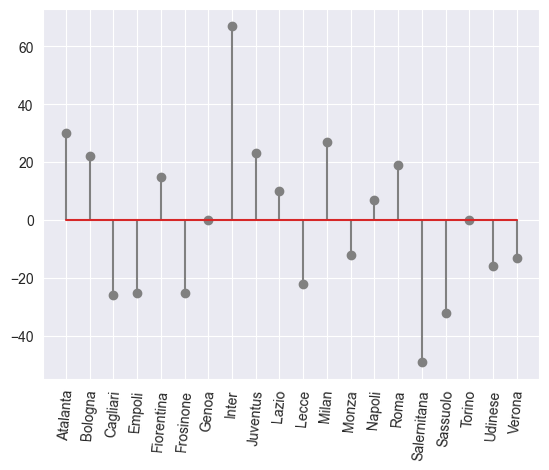

In [16]:
plt.stem(clasement['Team'],clasement['Goal_difference'],linefmt="grey",bottom=0,label="stem") 
plt.tick_params("x",rotation = 85)
plt.grid(True)
plt.show()

##### Insight

There are 9 teams whose goal difference is surplus (more than 0), there are also 9 teams whose goal difference is negative (less than 0), while the remaining two teams are drawn.


##### Export the DataFrame into csv files 

In [17]:
match_results.to_csv("match_results.csv",index=False)
goal_details.to_csv("goal_details.csv",index=False)
clasement.to_csv("clasement.csv",index=False)
goal_per_matchday.to_csv("goal_per_matchday.csv",index=False)